In [1]:
# Michael Spearing
# Started: April 26, 2017
# Data Science Lab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pygame
import time
pygame.mixer.init()
pygame.mixer.music.load("beep-07.wav")

In [3]:
def alert(num = 1):
    for x in range(num):
        pygame.mixer.music.play()
        time.sleep(2)

In [4]:
data = pd.read_csv("items-2014-01-01-2017-01-01-Weather.csv", index_col=0)
data["Date"] = pd.to_datetime(data["Date"], format='%Y-%m-%d')
data["Time"] = pd.to_datetime(data["Time"], format="1900-01-01 %H:%M:%S")

print data.head()
for ft in data.columns.values:
    print(type(data.loc[1,ft]))

        Date  Month  Day_of_month  Day_of_week                Time  \
0 2014-12-31     12            31            2 1900-01-01 14:06:56   
1 2014-12-31     12            31            2 1900-01-01 14:03:29   
2 2014-12-31     12            31            2 1900-01-01 14:02:26   
3 2014-12-31     12            31            2 1900-01-01 14:01:23   
4 2014-12-31     12            31            2 1900-01-01 14:00:56   

        Category         Item  Qty Price Point Name  Net Sales  \
0   1 Hot Drinks  Caffe Latte    1            16 oz       3.75   
1  2 Cold Drinks       Frappé    1    16.oz Caramel       4.29   
2   1 Hot Drinks        Mocha    1            12 oz       4.25   
3   1 Hot Drinks    Americano    1            12 oz       2.29   
4   1 Hot Drinks   Cappuccino    1    Regular Price       2.85   

                         Transaction ID  TEMP  PRCP  
0  aa80a203-88c8-4dae-a5e2-5f885e01182a  39.1   0.0  
1  926342ef-515a-4d48-96ac-e8c4e37b8590  39.1   0.0  
2  4f0f7023-cdd4-4b4

In [5]:
# Group the Data by Transaction ID
data_per_trans = data.drop(["Category", "Item","Price Point Name", "Time", "TEMP", "PRCP"], axis=1)
data_per_trans = data_per_trans.groupby(by=["Transaction ID", "Date", "Month", "Day_of_month", "Day_of_week"]).sum()
print(data_per_trans.shape)
print(len(data.loc[:,"Transaction ID"].unique()))
print(data_per_trans.columns.values)
data_per_trans.reset_index(inplace=True)
print(data_per_trans.head())

(239336, 2)
239330
['Qty' 'Net Sales']
                         Transaction ID       Date  Month  Day_of_month  \
0  000111e0-d474-4ed3-86d3-39fce5bb24d3 2015-03-02      3             2   
1  0001161c-0bb2-42fd-b689-3b992274a9b9 2015-03-29      3            29   
2  00018f7b-8831-4a6f-adfd-433b1cb78169 2014-06-21      6            21   
3  000223a7-6499-48d5-aefe-03fb95eae2c0 2014-12-12     12            12   
4  00042e9c-c8da-4625-aa48-a9f241a402b4 2015-04-22      4            22   

   Day_of_week  Qty  Net Sales  
0            0    2       6.70  
1            6    2       8.00  
2            5    1       4.29  
3            4    2       7.04  
4            2    2       7.50  


In [6]:
# There is something off in the data grouping...
ones = [1]*len(data_per_trans)
checking = pd.concat([data_per_trans, pd.Series(ones)], axis = 1)
checking = checking.groupby(by="Transaction ID").sum()
checking.reset_index(inplace=True)
checking = checking[checking.loc[:,0] > 1]
print checking.columns.values
print checking.shape
for err in checking["Transaction ID"]:
    print(data_per_trans[data_per_trans.loc[:,"Transaction ID"] == err])

['Transaction ID' 'Month' 'Day_of_month' 'Day_of_week' 'Qty' 'Net Sales' 0]
(6, 7)
                             Transaction ID       Date  Month  Day_of_month  \
36517  49fbfd9f-516e-4255-990f-4c3d07a77db0 2014-02-04      2             4   
36518  49fbfd9f-516e-4255-990f-4c3d07a77db0 2014-02-05      2             5   

       Day_of_week  Qty  Net Sales  
36517            1    1       3.69  
36518            2   -1      -3.69  
                  Transaction ID       Date  Month  Day_of_month  Day_of_week  \
93764  FGQ72q6HIPR2MRgN1NLhQV1eV 2016-12-03     12             3            5   
93765  FGQ72q6HIPR2MRgN1NLhQV1eV 2016-12-04     12             4            6   

       Qty  Net Sales  
93764    1       2.95  
93765   -1      -2.95  
                  Transaction ID       Date  Month  Day_of_month  Day_of_week  \
96489  FsRyob8B2hVIbSEEx9nhuKAfV 2015-05-12      5            12            1   
96490  FsRyob8B2hVIbSEEx9nhuKAfV 2015-05-13      5            13            2   

       Q

When returns are madeon a different day, a negative quantity is entered. This causes the groupby to give two entries to one transaction ID. Because there were only 6 returns on different days in the ~230000 transactions, we will remove them.

In [7]:
data_per_trans = data_per_trans.drop(data_per_trans[data_per_trans["Qty"] < 0].index)

In [21]:
print data_per_trans.head()
print data_per_trans.loc[:,"Net Sales"].mean()
print data_per_trans.loc[:,"Net Sales"].median()


                         Transaction ID       Date  Month  Day_of_month  \
0  000111e0-d474-4ed3-86d3-39fce5bb24d3 2015-03-02      3             2   
1  0001161c-0bb2-42fd-b689-3b992274a9b9 2015-03-29      3            29   
2  00018f7b-8831-4a6f-adfd-433b1cb78169 2014-06-21      6            21   
3  000223a7-6499-48d5-aefe-03fb95eae2c0 2014-12-12     12            12   
4  00042e9c-c8da-4625-aa48-a9f241a402b4 2015-04-22      4            22   

   Day_of_week  Qty  Net Sales  
0            0    2       6.70  
1            6    2       8.00  
2            5    1       4.29  
3            4    2       7.04  
4            2    2       7.50  
6.55287444115
4.94


       Net Sales
Month           
1      108803.55
2      112059.26
3      118998.80
4      134315.97
5      140931.18


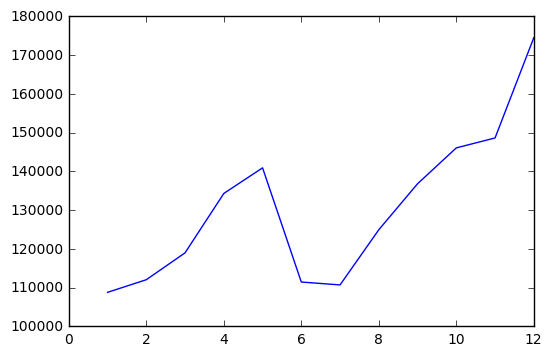

In [16]:
sales_per_month = data_per_trans.loc[:,["Net Sales", "Month"]].groupby(by="Month").sum()
print sales_per_month.head()
plt.plot(sales_per_month)
plt.show()

            Net Sales
Date                 
2014-01-02     604.43
2014-01-03     666.19
2014-01-04     482.12
2014-01-06     665.62
2014-01-07     921.73


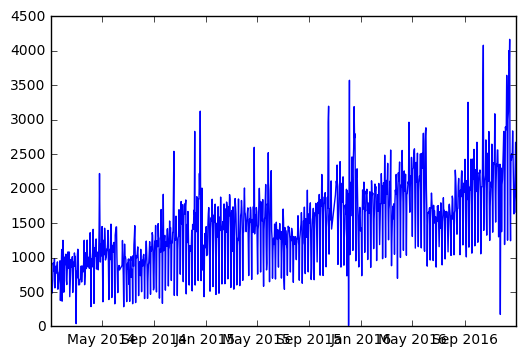

In [20]:
sales_per_month = data_per_trans.loc[:,["Net Sales", "Year", "Month"]].groupby(by="Month", "Year").sum()
print sales_per_month.head()
plt.plot(sales_per_month)
plt.show()